

Airline data set

*   Data Preparation
*   Train Embedding Layer
*   Train word2vec Embedding
*   Use Pre-trained Embedding





The necessary steps include (but aren’t limited to) the following:

1- Tokenizing sentences to break text down into sentences, words, or other units
2- Removing stop words like “if,” “but,” “or,” and so on
3- Normalizing words by condensing all forms of a word into a single form
4- Vectorizing text by turning the text into a numerical representation for consumption by your classifier

**Text** **corpus**
In linguistics, a corpus or text corpus is a language resource consisting of a large and structured set of texts.

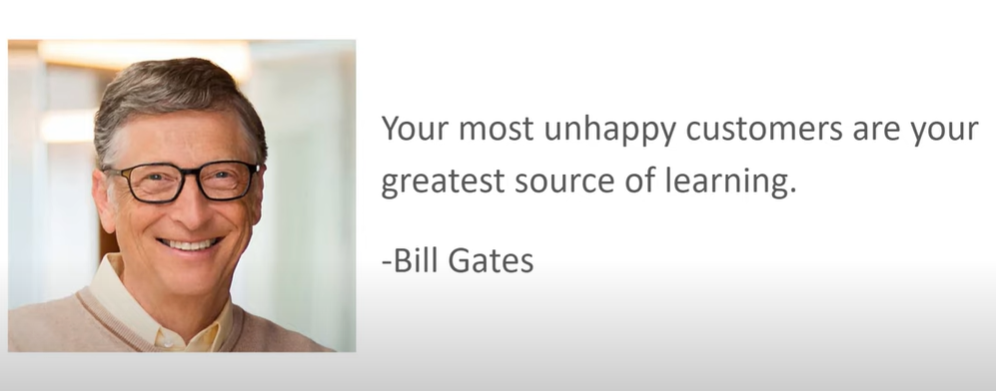

In [ ]:
pip install anvil-uplink # installing anvil package - 

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [2]:
#import relevant packages
import tensorflow as tf
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



there is number of data sets and all are diffretn in size and shape. Here we are working on a data set that has only two culumns, the first is TEXt for the reviews and the VALUE for the sentiment int lable- 0 for positive and 1 for negative. 
the other data sets msitly will have the object type lables of Postive, negative etc. they way to deal with this is to hot incode it in to a vector and convert the data to int type, for example: 


```
# review_df = df[['text','airline_sentiment']]
print(review_df.shape)
review_df.head(5)
```
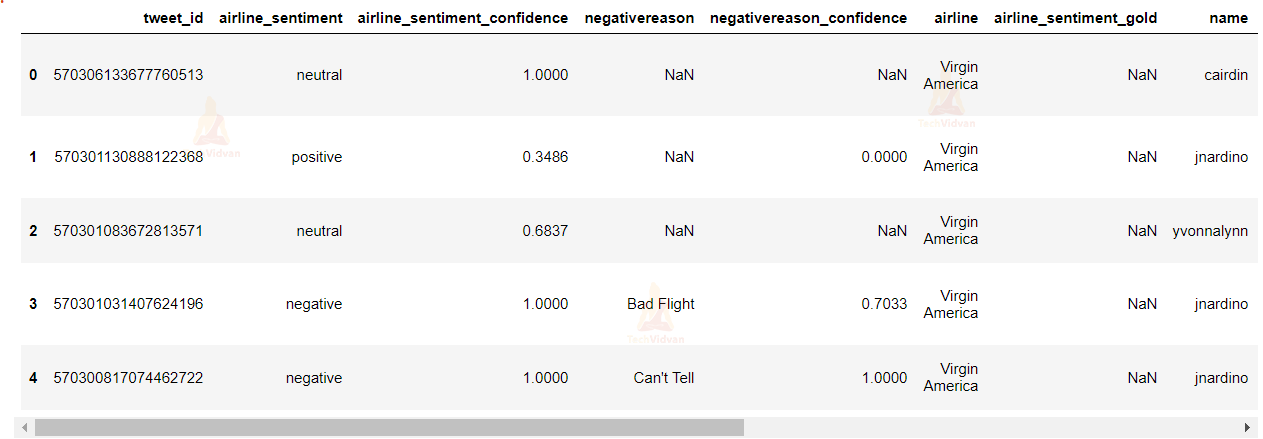


In [ ]:
dataset=pd.read_csv('airline_sentiment.csv')
dataset.head()

,airline_sentiment,text
0,1,@VirginAmerica plus you've added commercials t...
1,0,@VirginAmerica it's really aggressive to blast...
2,0,@VirginAmerica and it's a really big bad thing...
3,0,@VirginAmerica seriously would pay $30 a fligh...
4,1,"@VirginAmerica yes, nearly every time I fly VX..."


counting how many negative and positve reviews are there in the rsentiment culomn. 

In [ ]:
dataset["airline_sentiment"].value_counts() # Check the values of the airline_sentiment column.




0    9178
1    2363
Name: airline_sentiment, dtype: int64


NLTK is a toolkit build for working with NLP in Python. It provides us various text processing libraries with a lot of test datasets. A variety of tasks can be performed using NLTK such as tokenizing, parse tree visualization, etc

In [ ]:
import nltk
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


You cannot go straight from raw text to fitting a machine learning or deep learning model.

You must clean your text first, which means splitting it into words and handling punctuation and case.

In fact, there is a whole suite of text preparation methods that you may need to use, and the choice of methods really depends on your natural language processing task.

Using functions makes the code a lot cleaner. the following function is making use of the re package and it is used to clean the data i a way to remove all stop characters, special characters and commas etc.

First, let’s understand what a regular expression is. It is basically a special character sequence that helps you match or find other strings or sets of strings using that sequence as a pattern.

We can use the re library in Python to work with regular expression. This library comes preinstalled with the Python installation package.

Now, let’s perform word tokenization and sentence tokenization keeping RegEx in mind.

In [ ]:
def preprocess(text):# tokenization 
    text=text.lower()
    text=re.sub('[^0-9a-zA-Z]+',' ',text)# specify a regular expression pattern in the first argument, a new string in the second, and a string to be processed in the third.
    words = text.split()
    words2=[w for w in words if (w not in stop)]
    #words3=[ps.stem(w) for w in words]
    words4=' '.join(words2)
    return(words4)

Other examples of tokenization using the nltk
NLTK contains a module called tokenize() which further classifies into two sub-categories:

Word tokenize: We use the word_tokenize() method to split a sentence into tokens or words
Sentence tokenize: We use the sent_tokenize() method to split a document or paragraph into sentences
Let’s see both of these one-by-one.


```
from nltk.tokenize import word_tokenize 
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""
word_tokenize(text)
```



using our process function above, next we are going to clean our data from all the unnecessary characters and we are going to make sure that all the text is in the lower case. becuase Not will be looked ate and scored diffrently to not where this could lead to wrong analysis.

In [ ]:
dataset['text'] = dataset['text'].apply(preprocess) # processing the text 


After organising the data in the tokonized form for the bag of words algorithm -- we are counting how many times the word has appeared in the text. 

split() method as it is the most basic one. It returns a list of strings after breaking the given string by the specified separator. By default, split() breaks a string at each space. We can change the separator to anything. Let’s check it out.

In [ ]:
from collections import Counter
counts = Counter()
for i,review in enumerate(dataset['text']):
    counts.update(review.split())

In [ ]:
words = sorted(counts, key=counts.get, reverse=True)# sorting the words from lw to high 


the above shows the following 

term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

Term frequency: This summarize how often a word appears within a documents.

Inverse document frequency: This downsacles a words that appear a lot across documents  in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus

In [ ]:
words[0:20]

['united',
 'flight',
 'usairways',
 'americanair',
 'southwestair',
 'jetblue',
 'get',
 'cancelled',
 'thanks',
 'service',
 '2',
 'customer',
 'help',
 'time',
 'co',
 'hours',
 'http',
 'hold',
 'amp',
 'plane']

In [ ]:
#chars = words
#nb_chars = len(words)
#nb_chars
#chars

What is a Bag-of-Words? A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms. The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents
we use the CountVectorizer

The following is concidered as tyhe instantiate CountVectorizer() 


In [4]:
word_to_int = {word: i for i, word in enumerate(words, 1)}
int_to_word = {i: word for i, word in enumerate(words, 1)}

NameError: ignored

 CountVectorizer: CountVectorizer is used to convert a collection of text documents to a vector of token counts.

In the above code we converted a text (docs) into a vector form as you can see in the output.

How to do that (convert a text into a vector) :  we first assign a unique number to each word in our docs and then learn a vocabulary of all words by using CounterVectorizer.fit() method . (The machine understands the number, so the assigned number to a word is a word for machine).

After learning words we counted words means occurrence of each word in tokens (encoding documents) by using CountVectorizer.transform() method.

For example in the output as you can see in the features the second last word is "the", Now you see in the Final Vector the occurrence of "the" in first token is 1 , in second it is 2 , in  third 2 and so on...(For clarification see the docs, how many times word "the" occur in each token)

As you can see the shape of the final vector is (5,16),  here 5 represent number of samples and 16 represent features (data converted into machine learning type of data).


In [ ]:
word_to_int

In [ ]:
int_to_word

In [ ]:
mapped_reviews = []
for review in dataset['text']:
    mapped_reviews.append([word_to_int[word] for word in review.split()])

In [ ]:
print('Original text:',dataset.loc[0]['text'])
print('Mapped text:',mapped_reviews[0])

Original text: virginamerica plus added commercials experience tacky
Mapped text: [44, 450, 1142, 2233, 100, 5429]


In [ ]:
dataset.loc[0:1]['text']

0    virginamerica plus added commercials experienc...
1    virginamerica really aggressive blast obnoxiou...
Name: text, dtype: object

In [ ]:
mapped_reviews[0:2]

[[44, 450, 1142, 2233, 100, 5429],
 [44, 57, 3036, 3845, 3846, 815, 3037, 3847, 19, 366, 2234]]

In [ ]:
length_sent = []
for i in range(len(mapped_reviews)):
  length_sent.append(len(mapped_reviews[i]))
max(length_sent)

26

pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence

In [ ]:
sequence_length = max(length_sent)
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(maxlen=sequence_length, sequences=mapped_reviews, padding="post", value=0)

In [ ]:
X.shape


(11541, 26)

In [ ]:
X

array([[  44,  450, 1142, ...,    0,    0,    0],
       [  44,   57, 3036, ...,    0,    0,    0],
       [  44,   57,  328, ...,    0,    0,    0],
       ...,
       [   4,   22,   34, ...,    0,    0,    0],
       [   4,  376,  198, ...,    0,    0,    0],
       [   4,  251,   82, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y=dataset['airline_sentiment'].values

In [ ]:
y

array([1, 0, 0, ..., 1, 0, 0])

You can do the all the above by using the Tokenization methods instead. 

Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens. The tokens could be words, numbers or punctuation marks.
https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=10)
y_train2 = tf.keras.utils.to_categorical(y_train)
y_test2 = tf.keras.utils.to_categorical(y_test)

Embedding layer is one of the available layers in Keras. This is mainly used in Natural Language Processing related applications such as language modeling, but it can also be used with other tasks that involve neural networks. While dealing with NLP problems, we can use pre-trained word embeddings such as GloVe
Embedding layers in Keras are trained just like any other layer in your network architecture: they are tuned to minimize the loss function by using the selected optimization method

In [ ]:
embedding_vecor_length=32
max_review_length=26
model = Sequential()
model.add(Embedding(input_dim=12533, output_dim=32, input_length = 26))
model.add(SimpleRNN(40, return_sequences=False))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 26, 32)            401056    
                                                                 
 simple_rnn (SimpleRNN)      (None, 40)                2920      
                                                                 
 dense (Dense)               (None, 2)                 82        
                                                                 
Total params: 404,058
Trainable params: 404,058
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
12533*32

401056

In [ ]:
(32+40)*40+40

2920

In [ ]:
history = model.fit(X_train, y_train2, validation_data=(X_test, y_test2), epochs=10, batch_size=32)

Epoch 1/10
253/253 [==============================] - 4s 12ms/step - loss: 0.3282 - accuracy: 0.8667 - val_loss: 0.2505 - val_accuracy: 0.8986
Epoch 2/10
253/253 [==============================] - 3s 11ms/step - loss: 0.1449 - accuracy: 0.9506 - val_loss: 0.2611 - val_accuracy: 0.8955
Epoch 3/10
253/253 [==============================] - 3s 11ms/step - loss: 0.0698 - accuracy: 0.9780 - val_loss: 0.2937 - val_accuracy: 0.8888
Epoch 4/10
253/253 [==============================] - 3s 11ms/step - loss: 0.0379 - accuracy: 0.9892 - val_loss: 0.4004 - val_accuracy: 0.8862
Epoch 5/10
253/253 [==============================] - 3s 11ms/step - loss: 0.0206 - accuracy: 0.9926 - val_loss: 0.4274 - val_accuracy: 0.8972
Epoch 6/10
253/253 [==============================] - 5s 20ms/step - loss: 0.0134 - accuracy: 0.9952 - val_loss: 0.5031 - val_accuracy: 0.8891
Epoch 7/10
253/253 [==============================] - 5s 19ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.5387 - val_accuracy: 0.8862

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


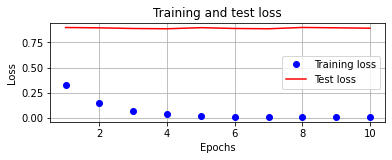

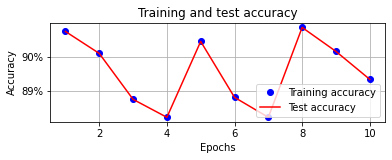

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_accuracy']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)
import matplotlib.ticker as mtick
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['val_accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [ ]:
sentiment = model.predict(X_test,batch_size=1,verbose = 2)



3463/3463 - 6s - 6s/epoch - 2ms/step


In [ ]:
round_sent=np.argmax(sentiment.round())
round_sent

1

In [ ]:
sentiment

array([[3.3743080e-01, 6.6256917e-01],
       [8.8787168e-02, 9.1121280e-01],
       [9.9953854e-01, 4.6151417e-04],
       ...,
       [9.9908304e-01, 9.1695914e-04],
       [9.9532783e-01, 4.6722158e-03],
       [9.9986470e-01, 1.3530438e-04]], dtype=float32)

#Anvil

Now let us look in to how we can deploy our note book to a simple web page. where we can upload a file and predict its lable. 

## Anvil function
you first need tocreat anviled account- aanvild will create a seAnvil uplink it will connect to your could server whcih can run your notebook on your device or where it is saved
 
you will need to pip install the Anvil  process
creat anvil function on your note book 
creat the anvile user interface and call your function from there. 

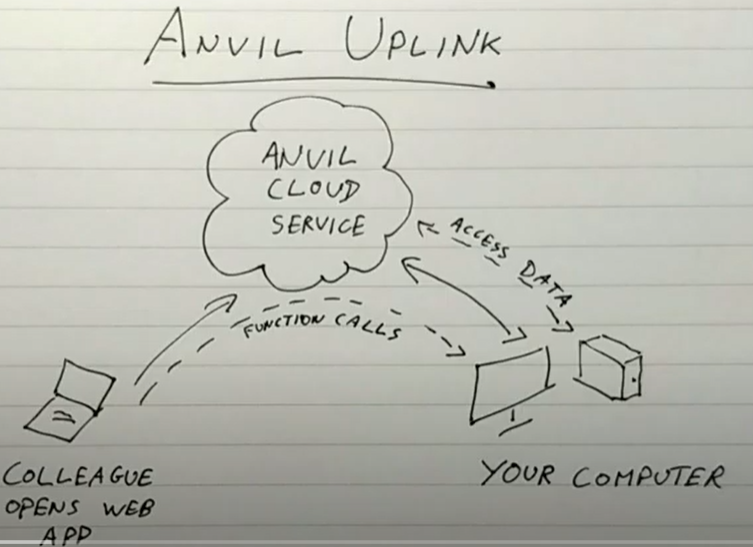

In [ ]:
 #preprocess('Text')


In [ ]:

import anvil.server

anvil.server.connect("WXGC2VDVPB6OXM67JJU6YINV-J7NEWLKTHAEMH2YK") ## the number here should be generated for you in your anvild project
# adding your uplink to your notebook 


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
@anvil.server.callable # adding your anvild call back
#creating the function for to be called by Anvil
def predict_sentiment(text):
   from keras.preprocessing.text import Tokenizer
   tokenizer = Tokenizer(num_words=5000)
   tw = tokenizer.texts_to_sequences([text])
   tw = pad_sequences(tw,maxlen=200)
   prediction=model.predict(tw,batch_size=1,verbose = 2)
   round_prediction = np.argmax(prediction.round())
   if round_prediction == 0:
      print("Predicted label: ", round_prediction)
      print(' the text is positive')
   else:
      print("Predicted label: ", round_prediction)
      print(' the text is negative') 

      return (round_prediction)


# Testing the function outputs before sending to anvil 

In [ ]:
test_sentence1 = "I enjoyed my journey on this flight."
predict1_sentiment(test_sentence1)
test_sentence2 = "This is the worst flight experience of my life!"
predict1_sentiment(test_sentence2)

1/1 - 0s - 116ms/epoch - 116ms/step
Predicted label:  0
 the text is positive
1/1 - 0s - 103ms/epoch - 103ms/step
Predicted label:  0
 the text is positive


https://2NNLTXLWWEA4WNSC.anvil.app/DSIKKSYT24Q7NP6VOALK7VCV